# Algoritmo ABC


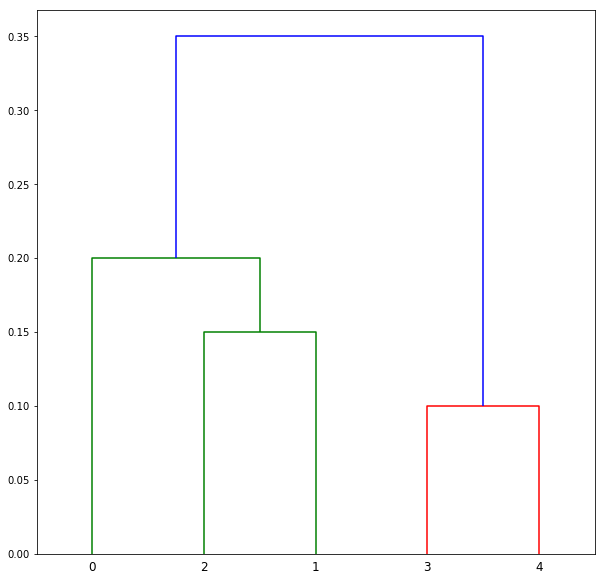

In [100]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

D = np.array([
    [3., 4., 0.1, 2.],
    [2., 1., 0.15, 2.],
    [0., 6., 0.2, 3.],
    [7., 5., 0.35, 5.]
])

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(D)
plt.show()


# Algoritmo AC

In [3]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

X=np.array([[0., 1., 1, 2.],
           [2., 3., 2, 2.],
           [5., 6., 3, 4.],
           [4., 7., 4, 5.]], dtype='float')

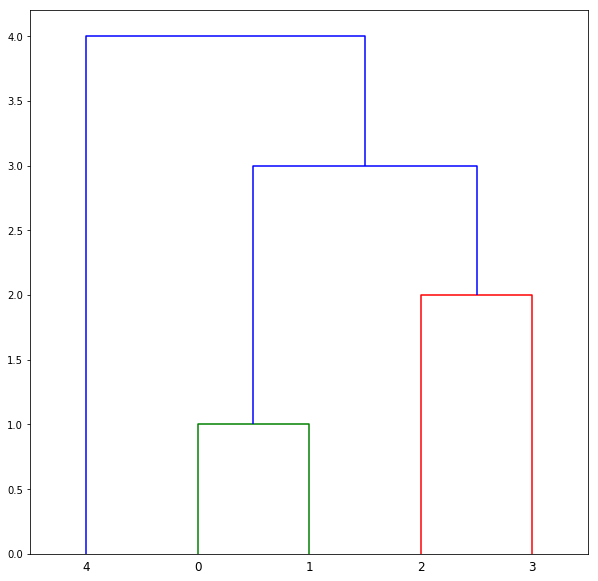

In [4]:
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(X)
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


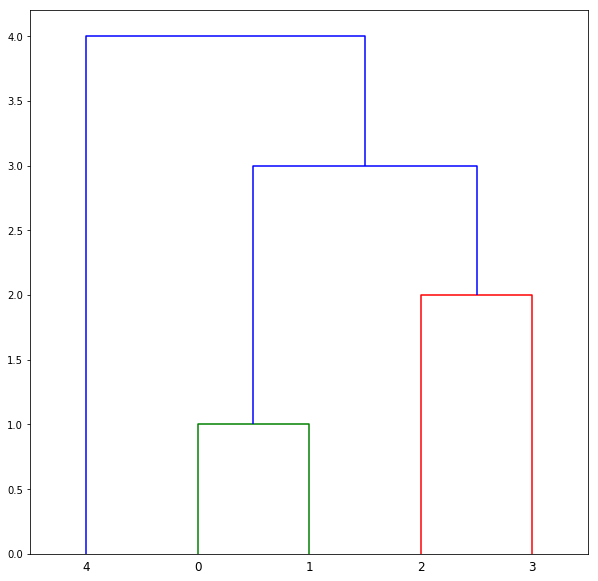

In [5]:
D = np.array([
    [0., 1., 3., 4., 7.],
    [1., 0., 4., 4., 8.],
    [3., 4., 0., 2., 8.],
    [4., 4., 2., 0., 7.],
    [7., 8., 8., 7., 0.]
])
Z = linkage(D, method="single")
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(X)
plt.show()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


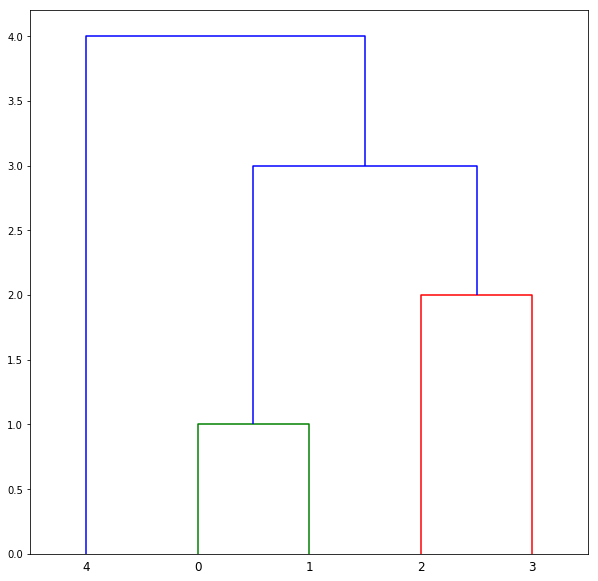

In [6]:
Z = linkage(D, method="complete")
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(X)
plt.show()

# Ward

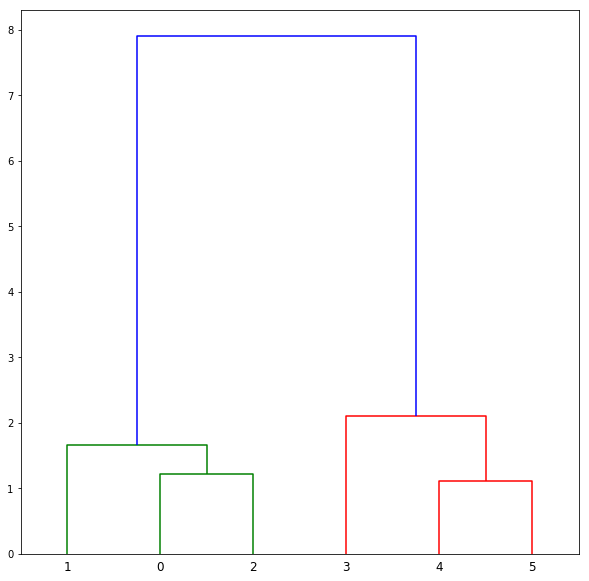

In [4]:
from scipy.cluster.hierarchy import ward

X = np.array([
     [1., 2.],
     [2., 1.],
     [2., 2.7],
     [5., 3.],
     [6.5, 2.],
     [7., 3.]
])
Z = ward(X)
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)
plt.show()

In [77]:
def wardX(X):
    total = X.shape[0]
    # matriz de linkage
    L = []
    # array que almacena clusteres usados
    C = []
    for _ in range(X.shape[0]):
        C.append(1)
    while C[-1] != total:
        H = []
        for i in range(X.shape[0]):
            for j in range(i+1, X.shape[0]):
                if C[i] and C[j]: 
                    H.append([i, j, np.sum(pow(X[i]-X[j], 2))])
        H = np.array(H)
        m = H[np.argmin(H[:,2])]
        i = int(m[0])
        j = int(m[1])
        L.append(np.append(m, C[i]+C[j]))
        mean = np.mean([X[i], X[j]], axis=0)
        # añadir al cluster y desactivar los otros
        X = np.append(X, [mean], axis=0)
        C.append(C[i]+C[j])
        C[i] = 0
        C[j] = 0
    return L

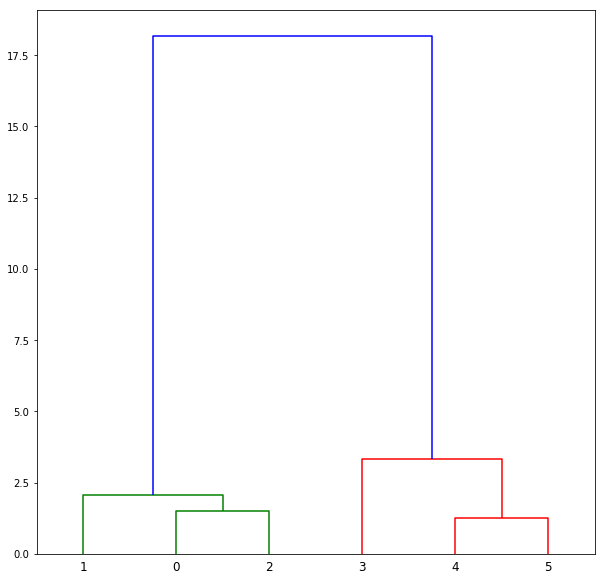

In [78]:
Z = wardX(X)
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)
plt.show()

# IRIS clusters

In [81]:
from sklearn.datasets import load_iris

X, Y = load_iris(return_X_y=True)

In [82]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

In [89]:
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy import stats
from sklearn.metrics import accuracy_score

# KMeans
print("KMeans")
for clusters in range(3,16):
    score = 0
    kmeans = KMeans(n_clusters=clusters, random_state=0)
    kmeans.fit(X[train_index])
    Y_labels = kmeans.predict(X[test_index])
    ok = 0
    total = 0
    for cluster in range(clusters):
        cluster_index = np.argwhere(Y_labels==cluster)
        try:
            Y_predict = stats.mode(Y[cluster_index])[0][0][0] # la clase que predice el cluster
        except:
            continue
        ok += np.sum(Y[cluster_index] == Y_predict) # los elementos cuya del cluster cuya clase coincide la predicha
        total += len(Y[cluster_index])
    score += ok/total
    print("Cluster: %d\tScore: %f" % (clusters, score))
# Min
print("Min")
for clusters in range(3,16):
    score = 0
    cluster = AgglomerativeClustering(n_clusters=clusters, linkage="single")
    Y_labels = cluster.fit_predict(X)
    ok = 0
    total = 0
    for cluster in range(clusters):
        cluster_index = np.argwhere(Y_labels==cluster)
        try:
            Y_predict = stats.mode(Y[cluster_index])[0][0][0] # la clase que predice el cluster
        except:
            continue
        ok += np.sum(Y[cluster_index] == Y_predict) # los elementos cuya del cluster cuya clase coincide la predicha
        total += len(Y[cluster_index])
    score += ok/total
    print("Cluster: %d\tScore: %f" % (clusters, score))
# Max
print("Max")
for clusters in range(3,16):
    score = 0
    cluster = AgglomerativeClustering(n_clusters=clusters, linkage="complete")
    Y_labels = cluster.fit_predict(X)
    ok = 0
    total = 0
    for cluster in range(clusters):
        cluster_index = np.argwhere(Y_labels==cluster)
        try:
            Y_predict = stats.mode(Y[cluster_index])[0][0][0] # la clase que predice el cluster
        except:
            continue
        ok += np.sum(Y[cluster_index] == Y_predict) # los elementos cuya del cluster cuya clase coincide la predicha
        total += len(Y[cluster_index])
    score += ok/total
    print("Cluster: %d\tScore: %f" % (clusters, score))
# Media
print("Media")
for clusters in range(3,16):
    score = 0
    cluster = AgglomerativeClustering(n_clusters=clusters, linkage="average")
    Y_labels = cluster.fit_predict(X)
    ok = 0
    total = 0
    for cluster in range(clusters):
        cluster_index = np.argwhere(Y_labels==cluster)
        try:
            Y_predict = stats.mode(Y[cluster_index])[0][0][0] # la clase que predice el cluster
        except:
            continue
        ok += np.sum(Y[cluster_index] == Y_predict) # los elementos cuya del cluster cuya clase coincide la predicha
        total += len(Y[cluster_index])
    score += ok/total
    print("Cluster: %d\tScore: %f" % (clusters, score))
# Ward
print("Ward")
for clusters in range(3,16):
    score = 0
    cluster = AgglomerativeClustering(n_clusters=clusters, linkage="ward")
    Y_labels = cluster.fit_predict(X)
    ok = 0
    total = 0
    for cluster in range(clusters):
        cluster_index = np.argwhere(Y_labels==cluster)
        try:
            Y_predict = stats.mode(Y[cluster_index])[0][0][0] # la clase que predice el cluster
        except:
            continue
        ok += np.sum(Y[cluster_index] == Y_predict) # los elementos cuya del cluster cuya clase coincide la predicha
        total += len(Y[cluster_index])
    score += ok/total
    print("Cluster: %d\tScore: %f" % (clusters, score))

KMeans
Cluster: 3	Score: 1.000000
Cluster: 4	Score: 1.000000
Cluster: 5	Score: 1.000000
Cluster: 6	Score: 1.000000
Cluster: 7	Score: 1.000000
Cluster: 8	Score: 1.000000
Cluster: 9	Score: 1.000000
Cluster: 10	Score: 1.000000
Cluster: 11	Score: 1.000000
Cluster: 12	Score: 1.000000
Cluster: 13	Score: 1.000000
Cluster: 14	Score: 1.000000
Cluster: 15	Score: 1.000000
Min
Cluster: 3	Score: 0.666667
Cluster: 4	Score: 0.680000
Cluster: 5	Score: 0.686667
Cluster: 6	Score: 0.693333
Cluster: 7	Score: 0.700000
Cluster: 8	Score: 0.700000
Cluster: 9	Score: 0.700000
Cluster: 10	Score: 0.706667
Cluster: 11	Score: 0.713333
Cluster: 12	Score: 0.760000
Cluster: 13	Score: 0.760000
Cluster: 14	Score: 0.760000
Cluster: 15	Score: 0.786667
Max
Cluster: 3	Score: 0.880000
Cluster: 4	Score: 0.880000
Cluster: 5	Score: 0.880000
Cluster: 6	Score: 0.880000
Cluster: 7	Score: 0.946667
Cluster: 8	Score: 0.946667
Cluster: 9	Score: 0.946667
Cluster: 10	Score: 0.946667
Cluster: 11	Score: 0.946667
Cluster: 12	Score: 0.94666